### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
%matplotlib inline

unity_env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
class EnvWrapper:
    def __init__(self, env, train_mode=False):
        self.env = env
        self.brain_name = env.brain_names[0]
        self.train_mode = train_mode
        brain = env.brains[self.brain_name]
        self.action_size = brain.vector_action_space_size
    
    def reset(self):
        env_info = self.env.reset(train_mode=self.train_mode)[self.brain_name]
        return env_info.vector_observations[0]
    
    def state_size(self):
        state = self.reset()
        return len(state)
    
    def step(self, action):
        env_info = self.env.step(action)[self.brain_name]        
        next_state = env_info.vector_observations[0]   
        reward = env_info.rewards[0]                  
        done = env_info.local_done[0]
        
        return next_state, reward, done

In [3]:
env = EnvWrapper(env=unity_env, train_mode=True)
state_size = env.state_size()
action_size = env.action_size

In [4]:
def train(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

In [5]:
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [ ]:
https://github.com/cstorm125/bananavigator

Episode 100	Average Score: 0.36
Episode 200	Average Score: 3.46
Episode 300	Average Score: 7.59
Episode 400	Average Score: 10.02
Episode 500	Average Score: 12.23
Episode 600	Average Score: 12.97
Episode 602	Average Score: 13.09
Environment solved in 502 episodes!	Average Score: 13.09


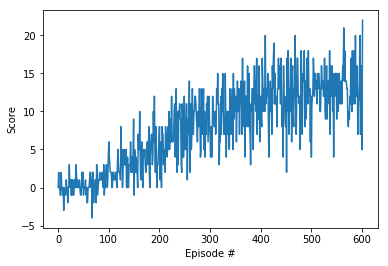

TypeError: __init__() missing 1 required positional argument: 'create_network'

In [6]:
from ddqn_prioritized_agent import Agent
from ddq_network import QNetwork

create_ddq_network = lambda state_size, action_size, seed: QNetwork(state_size, action_size, seed)

agent = Agent(create_network=create_ddq_network, state_size=state_size, action_size=action_size, seed=0)
scores = train(agent)
plot_scores(scores)


agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [ ]:
unity_env.close()